# Kaggleの「Extended_Employee_Performance_and_Productivity_Data」

このノートブックでは、Kaggleの「Extended_Employee_Performance_and_Productivity_Data」問題を通じて、データ分析の一連の流れを学びます。
目標は、〇を予測することです。
回帰問題の一例であり、簡易な回帰問題で解くことにします。

## Step1: 必要なライブラリのインポート
まずはじめに、データ分析に必要なライブラリをインポートします。以下のライブラリが必要です。

- pandas: データフレームを扱うためのライブラリ
- sklearn.model_selection: データセットを訓練データとテストデータに分割するための関数
- sklearn.linear_model: 線形回帰モデルのクラス
- sklearn.metrics: モデルの評価指標（MSE）を計算するための関数

-import matplotlib.pyplot as plt
-import seaborn as sns
-import japanize_matplotlib　を追加

In [94]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Step2: データの読み込みとデータの基礎分析
pandasのread_csv関数を使って、住宅価格のデータセット（CSV形式）を読み込みます。

In [95]:
# データの読み込み
# pandasのread_csv関数を使って、CSV形式のデータを読み込みます。
df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [96]:
# 基本的な統計量の計算
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


In [97]:
# データタイプと欠損値の確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [98]:
# 各カラムの欠損値の数を確認
df.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [99]:
# 無関係な列を削除
df = df.drop(['Employee_ID', 'Hire_Date'] ,axis=1)

In [100]:
# ラベルエンコーダーの初期化
labelencoder = LabelEncoder()
# カテゴリ変数のリスト
categorical_vars = ['Department', 'Gender', 'Job_Title', 'Education_Level', 'Resigned']

# カテゴリ変数を数値に変換
for var in categorical_vars:
    df[var] = labelencoder.fit_transform(df[var])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Department                   100000 non-null  int64  
 1   Gender                       100000 non-null  int64  
 2   Age                          100000 non-null  int64  
 3   Job_Title                    100000 non-null  int64  
 4   Years_At_Company             100000 non-null  int64  
 5   Education_Level              100000 non-null  int64  
 6   Performance_Score            100000 non-null  int64  
 7   Monthly_Salary               100000 non-null  float64
 8   Work_Hours_Per_Week          100000 non-null  int64  
 9   Projects_Handled             100000 non-null  int64  
 10  Overtime_Hours               100000 non-null  int64  
 11  Sick_Days                    100000 non-null  int64  
 12  Remote_Work_Frequency        100000 non-null  int64  
 13  

In [101]:
# 目的変数との相関を確認
df_check = df.select_dtypes(include=["int", "float"])
correlation = df_check.corr()["Resigned"].sort_values(ascending=False)
print("相関：", correlation)


相関： Resigned                       1.000000
Remote_Work_Frequency          0.007205
Age                            0.003519
Overtime_Hours                 0.002383
Sick_Days                      0.001711
Education_Level                0.001201
Training_Hours                 0.001172
Years_At_Company               0.000784
Department                     0.000361
Work_Hours_Per_Week            0.000145
Promotions                    -0.000743
Team_Size                     -0.000932
Gender                        -0.001243
Job_Title                     -0.001493
Monthly_Salary                -0.001524
Projects_Handled              -0.001713
Performance_Score             -0.002714
Employee_Satisfaction_Score   -0.002830
Name: Resigned, dtype: float64


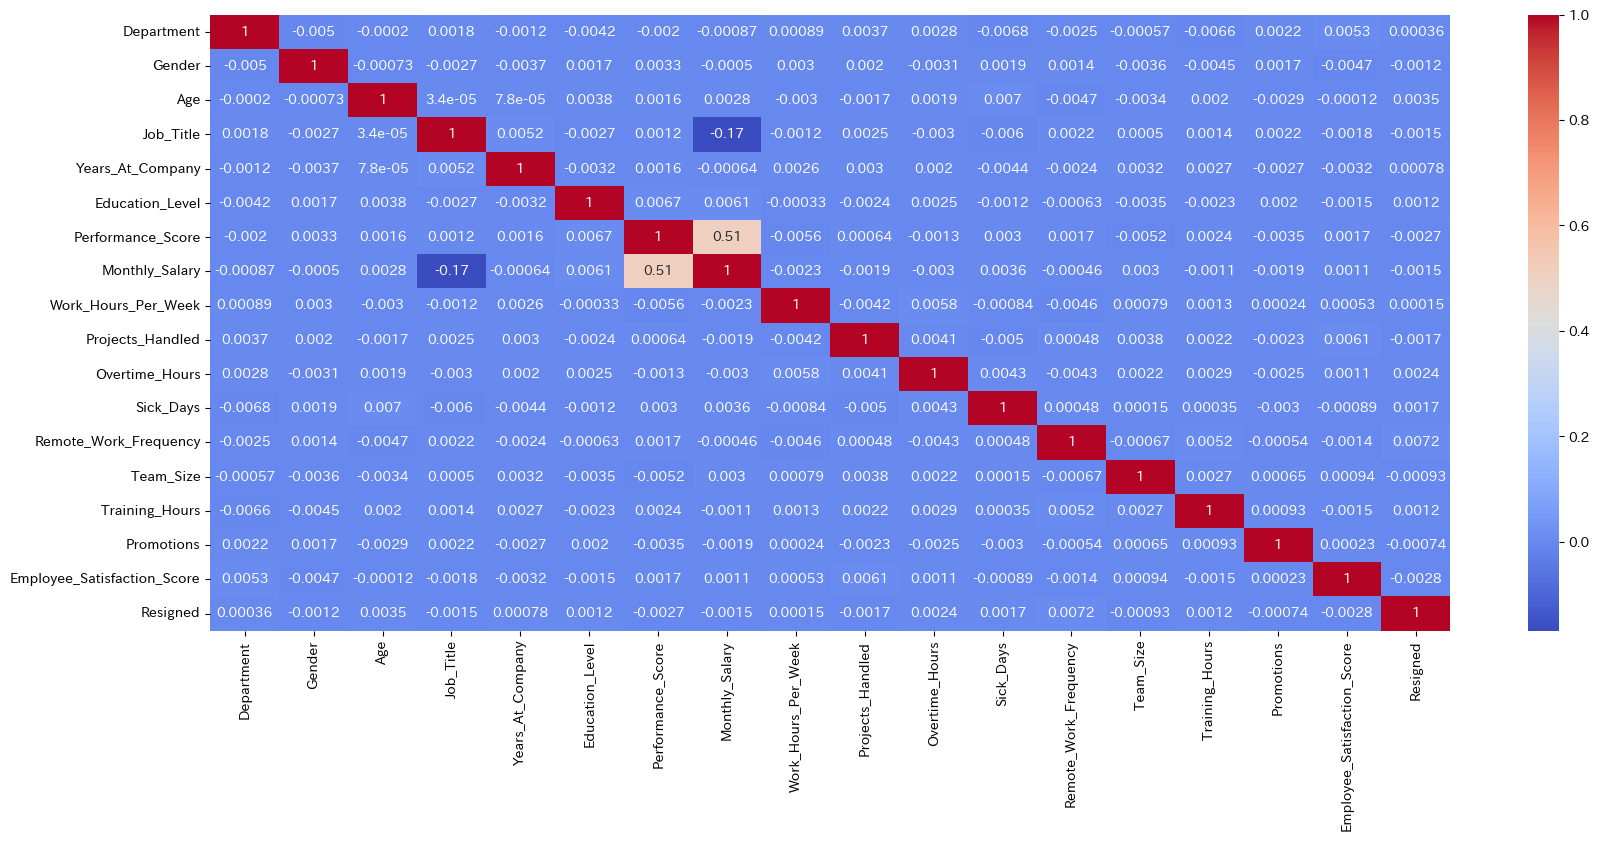

In [102]:
df_check = df.select_dtypes(include=['int', 'float'])
corr_matrix = df_check.corr()


# 相関のヒートマップを表示
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

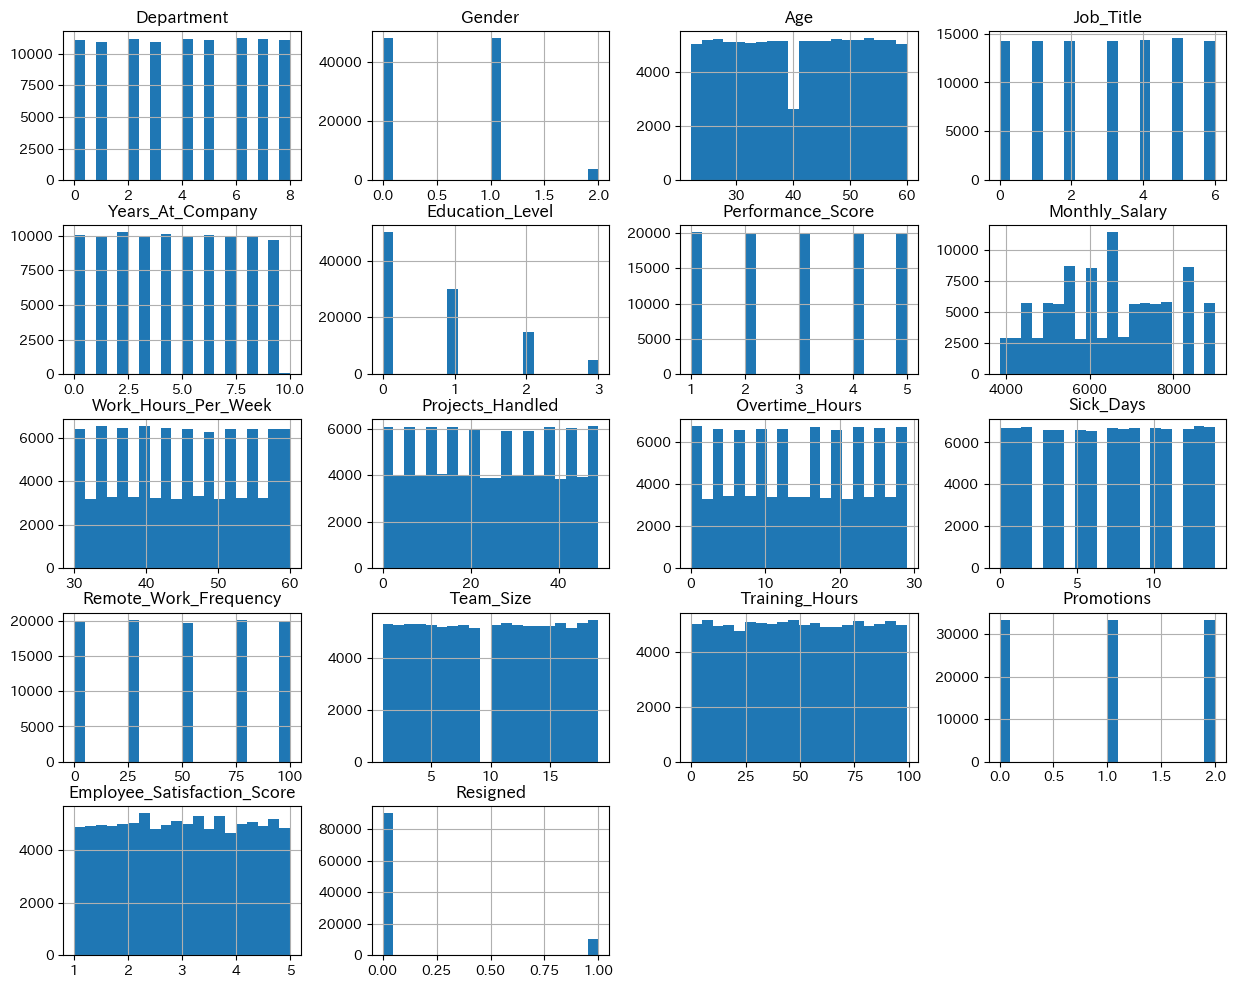

In [103]:
# 特徴量の分布を確認
df.hist(figsize=(15,12),bins = 20)
plt.title("Features Distribution")
plt.show()

# カテゴリ変数のバランスを確認
for col in df.columns:
    if df[col].dtype == 'object':
        print('\n', col)
        print(df[col].value_counts())

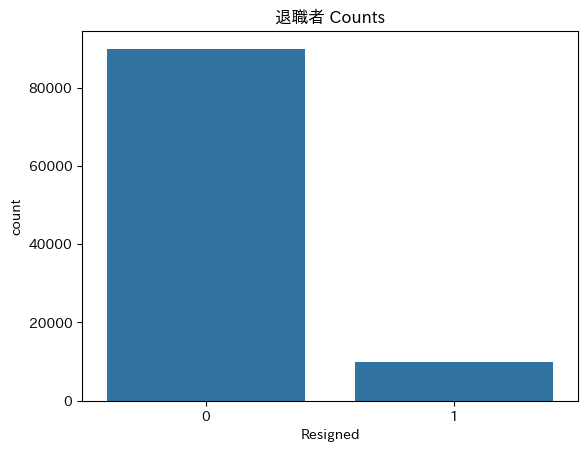

In [104]:
# 退職者の分布を確認
sns.countplot(x='Resigned', data=df)
plt.title('退職者 Counts')
plt.show()


In [105]:

# department単位でのコリレーション計算を出力、特定のカラムに限定
def calculate_specific_correlations(df, specific_columns, department_column='Department', target_column='Resigned'):
    departments = df[department_column].unique()
    department_correlations = pd.DataFrame(index=specific_columns, columns=departments)

    for department in departments:
        dept_df = df[df[department_column] == department]
        corr_matrix = dept_df[specific_columns].corrwith(dept_df[target_column])
        department_correlations[department] = corr_matrix
    
    return department_correlations

# 特定のカラムとの相関を計算
specific_columns = ['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score']
specific_correlations = calculate_specific_correlations(df, specific_columns)

# 結果を表示
print(specific_correlations)

                                    4         2         0         1         6  \
Age                          0.013972  0.001509 -0.002735  0.013129  0.000324   
Years_At_Company            -0.002855  0.003347  0.018600 -0.001374  0.002527   
Performance_Score            0.006445  0.006639 -0.006146 -0.010572 -0.017143   
Monthly_Salary               0.002964  0.013011 -0.012192 -0.014024 -0.005364   
Work_Hours_Per_Week         -0.007828 -0.002966  0.008074  0.013405 -0.012061   
Projects_Handled            -0.009673  0.001044  0.002839 -0.007197  0.011192   
Overtime_Hours               0.005665  0.000572  0.009018  0.006802  0.003148   
Sick_Days                    0.008651 -0.002778  0.012591 -0.005342  0.009808   
Remote_Work_Frequency        0.003595  0.016111  0.018692  0.008356  0.002194   
Team_Size                   -0.006585 -0.005503 -0.007369  0.009303  0.008816   
Training_Hours              -0.001802  0.003546  0.001483  0.014462 -0.002650   
Promotions                  

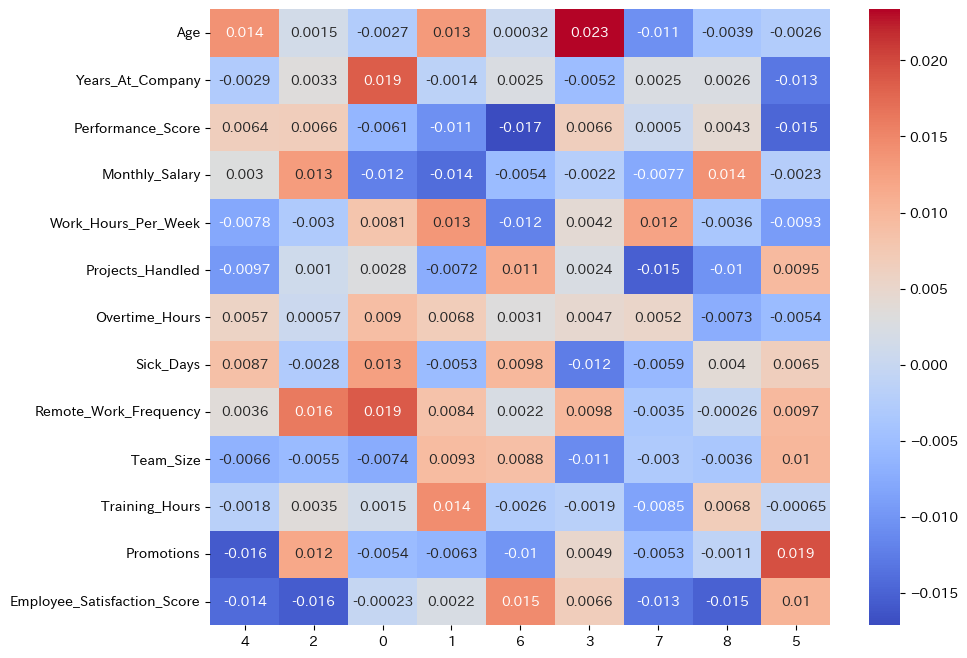

In [106]:
plt.figure(figsize=(10, 8))
sns.heatmap(specific_correlations, annot=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Employee_Satisfaction_Score vs Resigned')

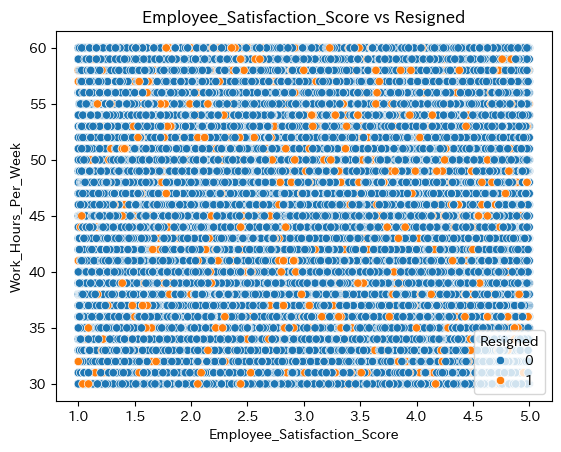

In [107]:
sns.scatterplot(x='Employee_Satisfaction_Score', y='Work_Hours_Per_Week', hue='Resigned', data=df)
plt.title('Employee_Satisfaction_Score vs Resigned') 


## Step3: データの前処理
データの前処理では、欠損値の補完や特徴量の選択などを行います。今回は、単純化のために数値データのみを使用し、欠損値は0で補完します

In [108]:
# データの前処理  欠損処理はないため不要
# この例では、単純化のために数値データのみを使用します。また、欠損値は0で補完します。
#（numpyを使わない場合は、データを選択する際に、df.select_dtypes(include=[np.number])の代わりに、df.select_dtypes(include=['int', 'float'])と選択したり、統計量から確認して、必要なカラムを指定しても良い。
# 本来は、数値以外のカテゴリーデータ等も有効活用することで、更なる精度向上が期待できる
df = df.select_dtypes(include=[np.number]).fillna(0)


## Step4: 特徴量と目的変数の選択
特徴量とはモデルが予測を行うために使用するデータのことで、目的変数とは予測を行う対象のデータのことです。この例では、特徴量は目的変数（SalePrice）以外の全ての数値カラムを使用し、目的変数はSalePriceカラムの値とします。

In [109]:
# 特徴量と目的変数の選択
# 慣習で説明変数はX、目的変数はyと表記することが多い
# 特徴量は目的変数（Resigned）以外の全ての数値カラムを使用します。
# 目的変数はResignedカラムの値とします。
# データを特徴量(X)とターゲット(y)に分割
X = df.drop('Resigned', axis=1)
y = df['Resigned']


## Step5: データセットの分割
train_test_split関数を使ってデータセットを訓練用とテスト用に分割します。モデルの性能を評価するためには、訓練には使用していないデータでテストを行う必要があります。

In [110]:
# データセットの分割
# train_test_split関数を使ってデータセットを訓練用とテスト用に分割します。
# データをランダムに分割している。ただし、時系列データ等の場合、時系列が破壊されないよう注意する
# この例ではデータセットの30%をテスト用に使います（test_size=0.3）。



# データをトレーニングセット(70%)とテストセット(30%)に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 決定木分類器を初期化
dt_model = DecisionTreeClassifier(random_state=1)

# モデルをトレーニングデータにフィット
dt_model.fit(X_train, y_train)

# テストデータで目的変数を予測
y_pred_dt = dt_model.predict(X_test)

# モデルの精度を計算
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# 分類レポートを計算
class_report_dt = classification_report(y_test, y_pred_dt)

# 混同行列を計算
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

accuracy_dt, class_report_dt, conf_matrix_dt

(0.7975666666666666,
 '              precision    recall  f1-score   support\n\n           0       0.90      0.87      0.89     26966\n           1       0.10      0.12      0.11      3034\n\n    accuracy                           0.80     30000\n   macro avg       0.50      0.50      0.50     30000\nweighted avg       0.82      0.80      0.81     30000\n',
 array([[23566,  3400],
        [ 2673,   361]]))

In [111]:
# 特徴の重要度を取得
feature_importances_dt = dt_model.feature_importances_

# 可視化のためのデータフレームを作成
importances_df_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_dt
})

# 重要度でデータフレームをソート
importances_df_dt = importances_df_dt.sort_values(by='Importance', ascending=False)

importances_df_dt

,Feature,Importance
16,Employee_Satisfaction_Score,0.128736
9,Projects_Handled,0.095512
2,Age,0.089991
10,Overtime_Hours,0.084421
14,Training_Hours,0.080829
8,Work_Hours_Per_Week,0.080760
13,Team_Size,0.066003
11,Sick_Days,0.063795
7,Monthly_Salary,0.057547
4,Years_At_Company,0.055477


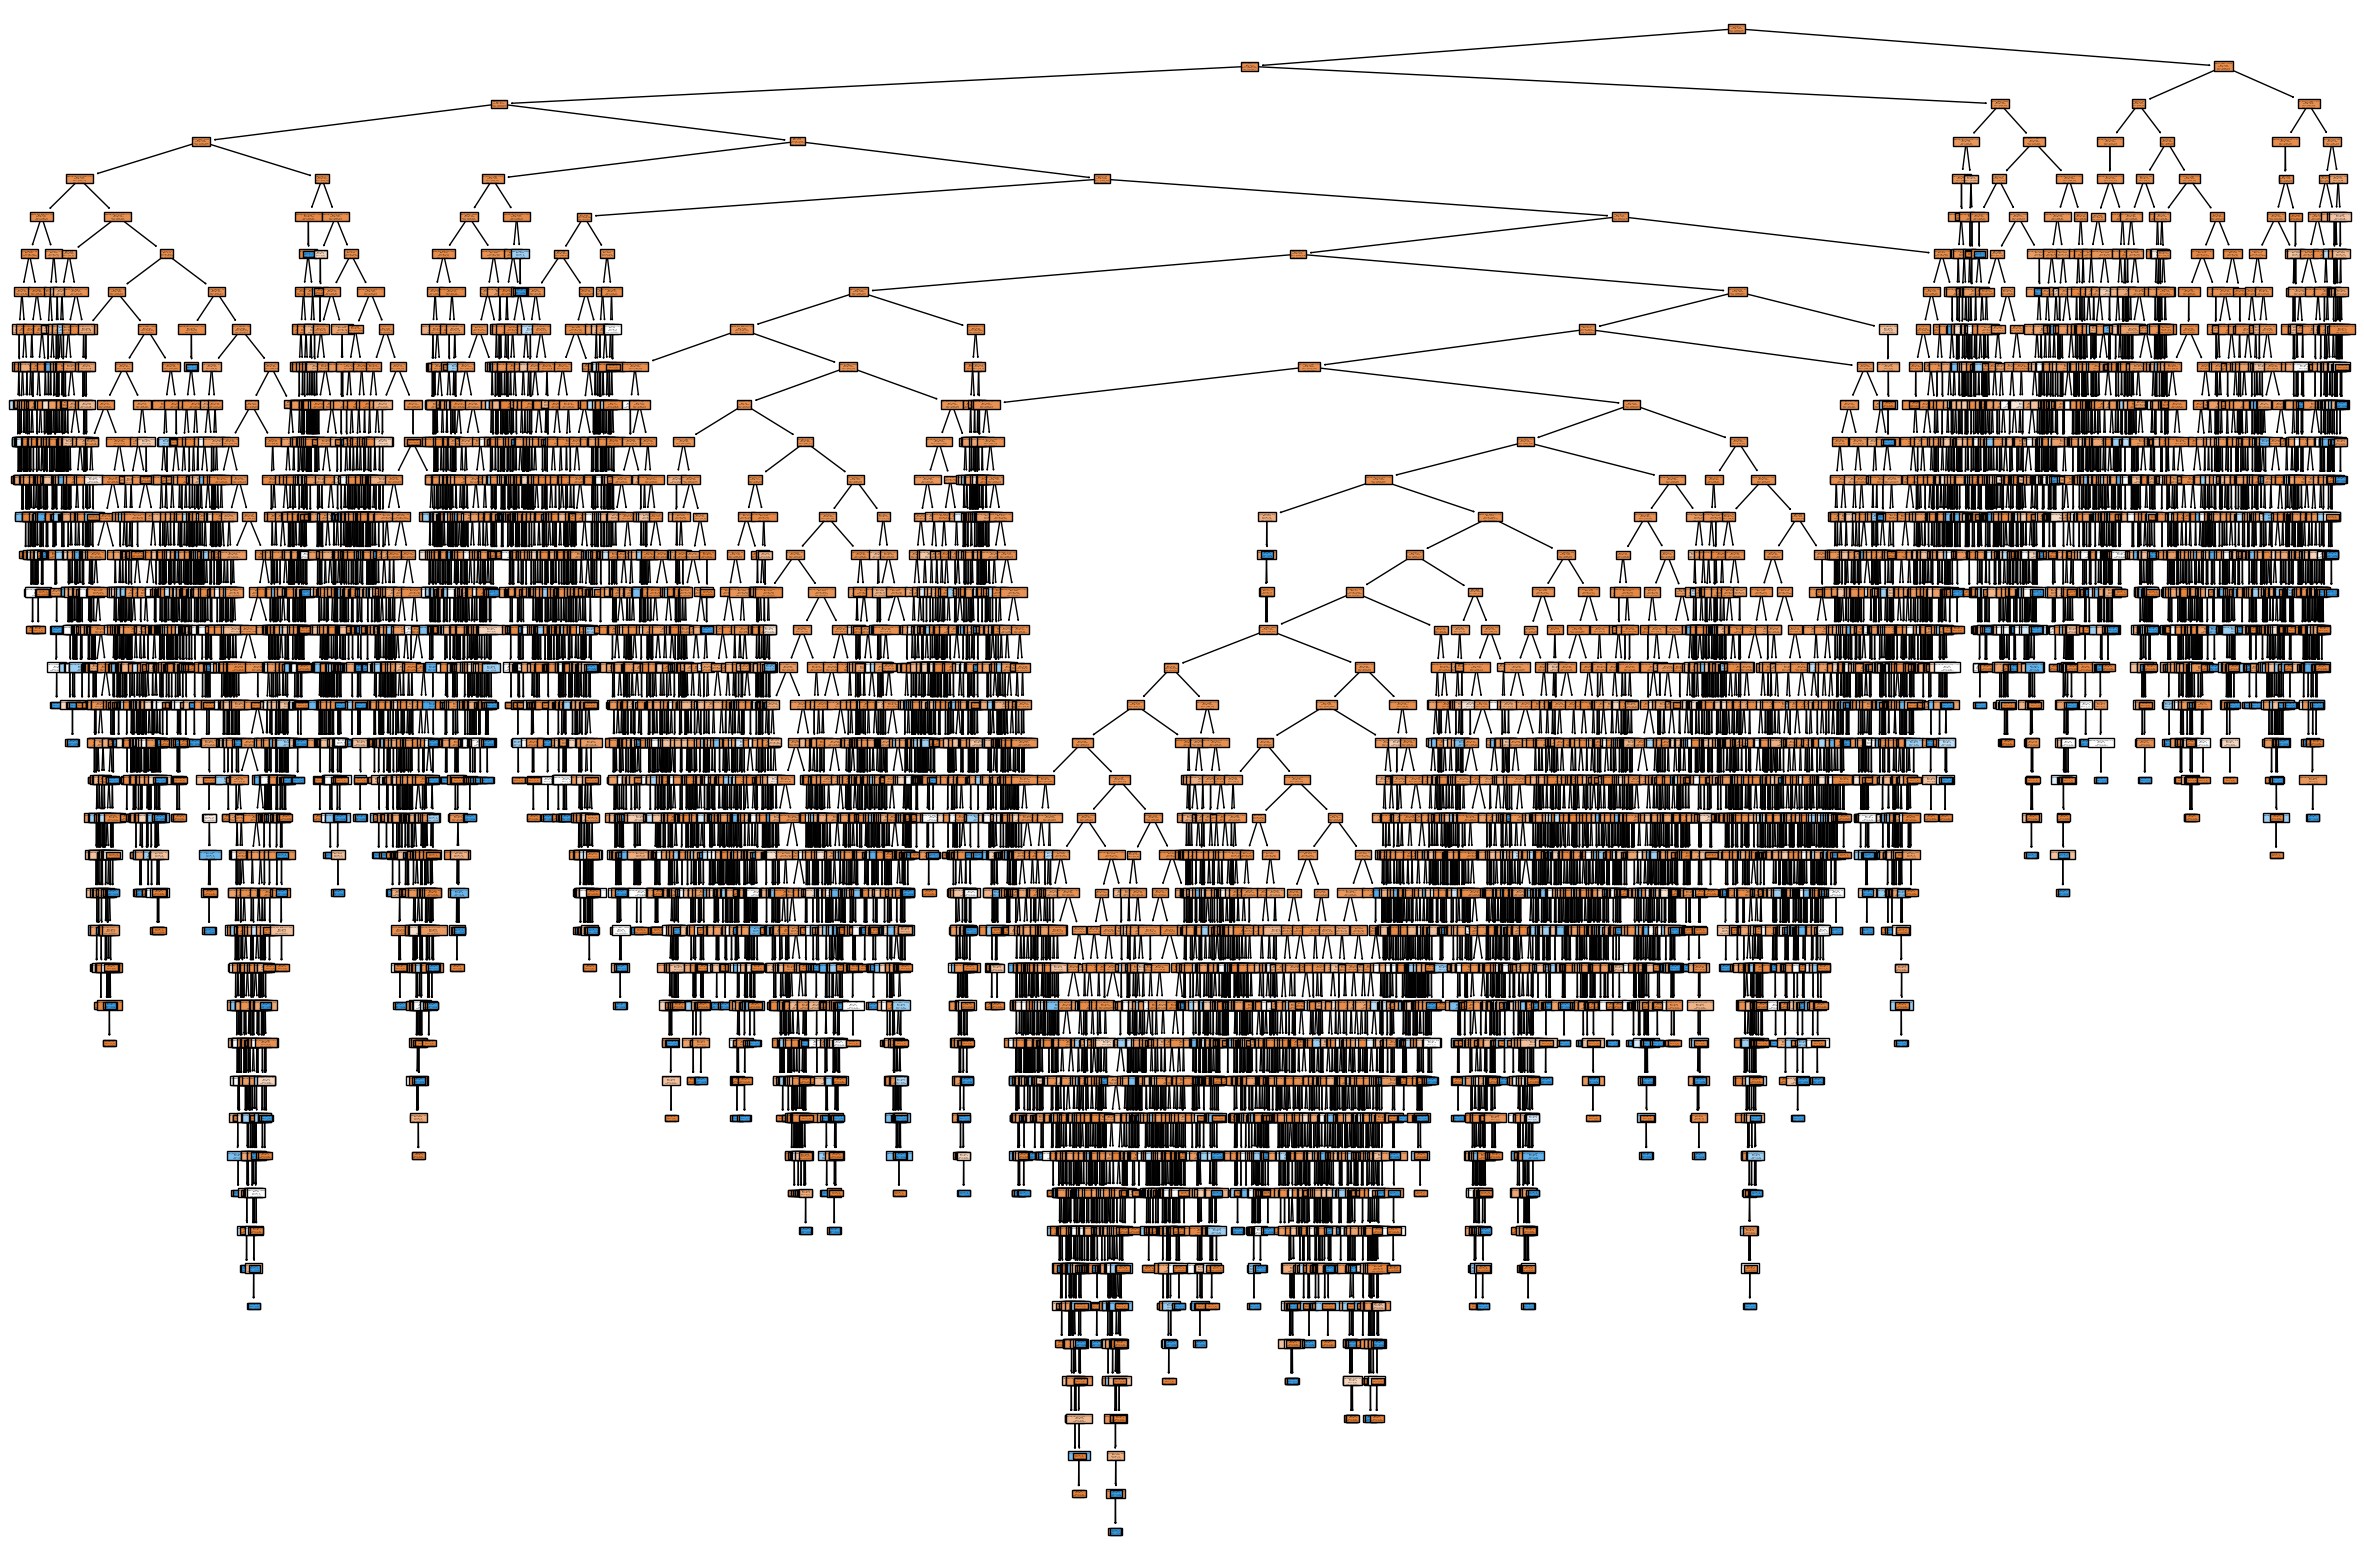

In [112]:
from sklearn import tree
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(30,20))

# Create a decision tree plot
tree.plot_tree(dt_model,
               feature_names=X_train.columns,
               class_names=['No Attrition', 'Attrition'],
               filled=True)

# Show the plot
plt.show()

In [113]:

# ラベルエンコーダーを初期化
labelencoder = LabelEncoder()

# カテゴリー変数のリスト
categorical_vars = ['Department', 'Gender', 'Job_Title',  'Education_Level', 'Resigned']

# カテゴリー変数を変換
for var in categorical_vars:
    df[var] = labelencoder.fit_transform(df[var])

# データを特徴量(X)とターゲット(y)に分割
X = df.drop('Resigned', axis=1)
y = df['Resigned']

# データを訓練セット(70%)とテストセット(30%)に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# ランダムフォレスト分類器を初期化
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# モデルを訓練データに適合
rf_model.fit(X_train, y_train)

# テストデータのターゲット変数を予測
y_pred = rf_model.predict(X_test)

# モデルの精度を計算
accuracy = accuracy_score(y_test, y_pred)

# 分類レポートを計算
class_report = classification_report(y_test, y_pred)

# 混同行列を計算
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, class_report, conf_matrix

c:\Users\tachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

(0.8988666666666667,
 '              precision    recall  f1-score   support\n\n           0       0.90      1.00      0.95     26966\n           1       0.00      0.00      0.00      3034\n\n    accuracy                           0.90     30000\n   macro avg       0.45      0.50      0.47     30000\nweighted avg       0.81      0.90      0.85     30000\n',
 array([[26966,     0],
        [ 3034,     0]]))

In [114]:
# 特徴量の重要度を取得
feature_importances = rf_model.feature_importances_

# 可視化のためのデータフレームを作成
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# 重要度によってデータフレームを並び替え
importances_df = importances_df.sort_values(by='Importance', ascending=False)

importances_df

,Feature,Importance
16,Employee_Satisfaction_Score,0.108938
14,Training_Hours,0.096016
9,Projects_Handled,0.086095
2,Age,0.082457
8,Work_Hours_Per_Week,0.077168
10,Overtime_Hours,0.076012
13,Team_Size,0.067960
11,Sick_Days,0.063347
7,Monthly_Salary,0.056538
4,Years_At_Company,0.055243


## Step6: 線形回帰モデルの訓練
線形回帰モデルは最も基本的な予測モデルの一つで、特徴量と目的変数の間の線形の関係を仮定します。LinearRegressionクラスのインスタンスを作成し、fitメソッドを使ってモデルを訓練します。この訓練プロセスで、モデルはデータから学習し、未知のデータを予測する能力を獲得します。

In [115]:
# 線形回帰モデルの訓練
# LinearRegressionクラスのインスタンスを作成し、fitメソッドを使ってモデルを訓練します。
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\tachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step7: モデルの評価
訓練したモデルがどれだけの性能を持つかを評価します。この例では、predictメソッドを使って訓練データとテストデータの予測値を計算し、mean_squared_error関数を使って訓練データとテストデータの平均二乗誤差（MSE）を計算します。MSEは予測誤差の平均値で、値が小さいほどモデルの予測精度が高いことを示します。

In [116]:
# モデルの評価
# predictメソッドを使って訓練データとテストデータの予測値を計算します。
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# そしてmean_squared_error関数を使って訓練データとテストデータの平均二乗誤差（MSE）を計算します。
# ただし、最終的な評価はKaggle側で用意されたテストデータに対する予測精度（RMSLE等）による
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)


In [117]:
print('訓練データのMSE:', train_mse)
print('テストデータのMSE:', test_mse)

訓練データのMSE: 0.09965714285714286
テストデータのMSE: 0.10113333333333334
